<div>
<img src="https://www.th-koeln.de/img/logo.svg" width="100">
</div>

## Erste Meilensteinpräsentation Projektgruppe G

*Gruppe G: Erkut Cabalar, Hassan Bougacha, Philipp Weiler, Thomas Schmitz*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
from matplotlib import rcParams
import seaborn as sns
import pandas as pd
import os
import math
import time
#import dates
import datetime
import pytz
import re
import random

## 1. Steckbrief

**Betrachtets System: Spielekonsole (private Nutzung)**

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/71/Sony-PlayStation-4-PS4-wDualShock-4.jpg/800px-Sony-PlayStation-4-PS4-wDualShock-4.jpg" width="300">

Für die Untersuchung der Energieeffizienz stehen uns eine Playstation 4 sowie eine Nintendo Switch zur Verfügung. Primär soll in unserem Projekt die Playstation 4 untersucht werden und später ein Vergleich zur Nintendo Switch gezogen werden.


Angaben zur Energieeffizienz von [Sony. *Datenqualität* Dez. 2020](https://www.playstation.com/de-de/corporate/playstation-and-the-environment/our-products/):

<blockquote> <b> Energieeffizienz - Wie viel Energie verbraucht meine Konsole? </b>

[..]

CUH-10xx         148 bis 155 kWh/Jahr

CUH-11xx         133 bis 140 kWh/Jahr

CUH-12xx         109 bis 111 kWh/Jahr

CUH-20xx         84 bis 89 kWh/Jahr

CUH-21xx         82 bis 86 kWh/Jahr

CUH-22xx         81 bis 85 kWh/Jahr </blockquote>


Bei unserer Konsole handelt es sich um ein Modell mit der Nummer CUH-12xx. Sony stellt dafür folgende Daten zur durchschnittlichen Leistungsaufnahme zur Verfügung: [Ecodesign-Angaben von Sony. *Datenqualität* Dez. 2020](https://www.playstation.com/de-de/legal/ecodesign/)

<blockquote> <b> PlayStation®4-Modellnummer: CUH-12XX: </b>

HD

- Aktives Spielen: 95,1 W 
- DVD-Wiedergabe: 74,7 W  
- Blu-ray-Wiedergabe: 66,9 W  
- Medienstreaming: 67,5 W  
- Benutzeroberfläche Home-Menü: 65,9 W 

Geringe Leistungsaufnahme

- Aus: 0,3 W          
- Ruhemodus (Stromversorgung der USB-Ports): 4,0 W 
- Ruhemodus (mit dem Internet verbunden bleiben): 1,3 W 
- Ruhemodus (Anwendung anhalten): 2,5 W 
- Ruhemodus (Alle): 5,2 W </blockquote>

### Hauptziele des Projektes:

Die Angaben des Herstellers sollen unter möglichst realen Bedingungen überprüft und anschließend eine Aussage über die benötigte Energie pro Spielstunde getroffen werden. Hinsichtlich der Energieeffizienz wird die Spielekonsole von Sony mit der mindestens eines anderen Herstellers verglichen.


## 2. Anforderungen

### Ishikawa-Diagramm:
![Ishikawa](img/2020-12-04_SYE_ProjektG_Ishikawa.jpg)

### Anforderungsliste:

[Link zur Excel-Datei der Anforderungsliste](data/2020-12-01_SYE_ProjektG_Anforderungstabelle.xlsx)
![Anforderungstabelle](img/2020-12-04_SYE_ProjektG_Anforderungstabelle.png)

## 3. Testmessung: Sony Playstation 4

Grafikparameter:

In [3]:
sns.set(style = "darkgrid")
sns.set(rc = {"figure.figsize" : (16, 5)})
# matplotlib
linw = 2 # Linienbreite
lincol = 'orange' # Linienfarbe
lincol2 = 'red'
rcParams['font.family'] = 'sans-serif' # serifenfreie Schrift in Abbildungen
rcParams['font.size'] = 16 # Schriftgröße

In [4]:
def read_energy_logger_file(path_to_file):

    # Check if path exists
    if not os.path.exists(path_to_file) or not os.path.isfile(path_to_file):
        raise Exception("No file at given path!")
        
    # Read data into pandas dataframe
    df = pd.read_csv(path_to_file, header = 7)

    # Rename columns
    df = df.rename(columns = {"Aufnahmezeit": "timestamp", "Stromstärke (A)": "Current [A]", "Wirkleistung (W)": "Active Power [W]", "Scheinleistung (W)": "Apparent Power [W]"})

    # Since the data provided by the energy logger
    # is not formated correctly for further usage,
    # each cell needs to be reformated.

    # Iterate through dataframe and reformat data
    for index, row in df.iterrows():
        
        # Reformat other columns
        for column in df.columns:
            if not column == "timestamp":
                
                # Get string from cell
                string = row[column].replace(",", ".")

                # Create float from string
                value = float(string)
                
                # Set reformated cell
                row[column] = value

    # Cast data types to float 64
    for column in df.columns:
        if not column == "timestamp":
            df = df.astype({column: 'float64'})
            
            
    # Store datetime object in timestamp
    df["timestamp"] = df["timestamp"].apply(lambda x: datetime.datetime.strptime(x, "%d-%m-%Y %H:%M:%S"))

    return df

In [5]:
Playstation = read_energy_logger_file('data/2020-12-01_SYE_ProjektG_Daten_Playstation.csv')
Playstation.head()

timestamp  Current [A]  Active Power [W]  Apparent Power [W]
0 2020-12-01 22:00:00          0.0               0.0                 0.0
1 2020-12-01 22:01:00          0.0               0.0                 0.0
2 2020-12-01 22:02:00          0.0               0.0                 0.0
3 2020-12-01 22:03:00          0.0               0.0                 0.0
4 2020-12-01 22:04:00          0.0               0.0                 0.0

In [6]:
IPlaystation = Playstation['Current [A]']
Imax = IPlaystation.max()
print('Maxmimalwert der Stromstärke: ' + str(Imax) + ' A' )
PPlaystation = Playstation['Active Power [W]']
Pmax = PPlaystation.max()
print('Maxmimalwert der Wirkleistung: ' + str(Pmax) + ' W' )

Maxmimalwert der Stromstärke: 0.595 A
Maxmimalwert der Wirkleistung: 123.96825 W


Text(0, 0.5, 'Wirkleistung [W]')

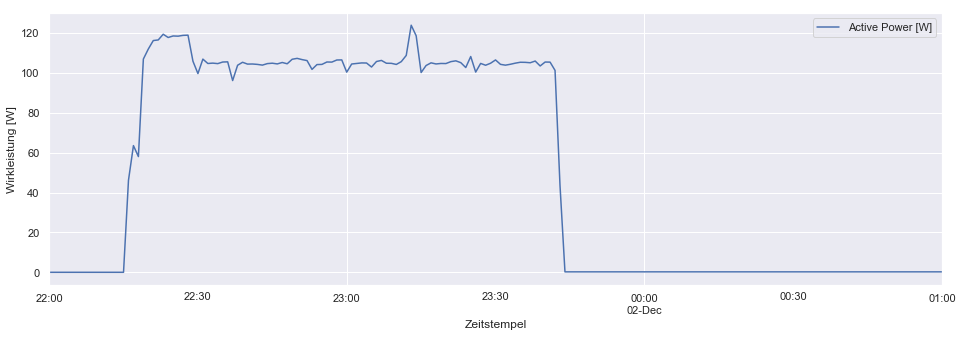

In [8]:
ax = Playstation.plot(x='timestamp',y='Active Power [W]')
ax.set_xlabel('Zeitstempel')
ax.set_ylabel('Wirkleistung [W]')